In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [54]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True)
df = data.frame

In [55]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [56]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [57]:
df[['AveRooms','AveBedrms']].corr()


,AveRooms,AveBedrms
AveRooms,1.000000,0.847621
AveBedrms,0.847621,1.000000


In [59]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [61]:
# Splitting into independent and dependent features
X=df.drop('MedHouseVal',axis=1)
y=df['MedHouseVal']

In [62]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [63]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [65]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [66]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
y_pred = lr.predict(X_test)

In [68]:
#cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(lr,X_train,y_train,scoring='neg_mean_squared_error',cv=3)
validation_score

array([-0.52100984, -0.50309498, -0.54449947])

In [69]:
np.mean(validation_score)

np.float64(-0.5228680951852532)

In [74]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MAE:",mae)
print("MSE:",mse)   
print("RMSE:",rmse)
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 0.5296964012919461
MSE: 0.541128747847069
RMSE: 0.735614537544677
R2 Score: 0.591050979549135


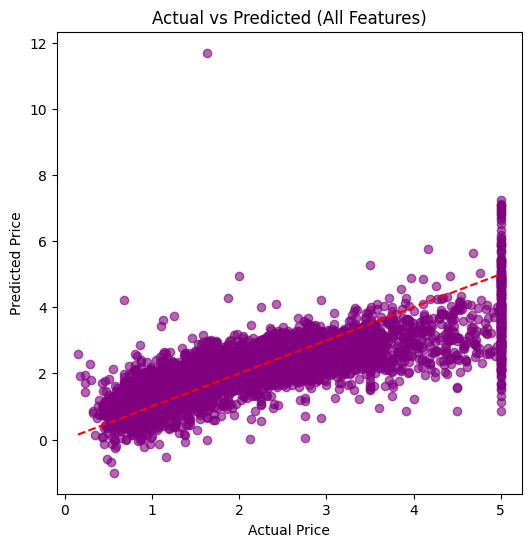

In [71]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted (All Features)")
plt.show()

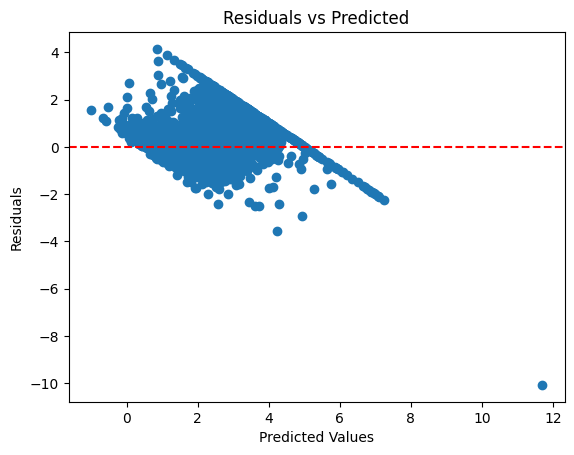

In [72]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


In [75]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [83]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(poly.transform(X_test))

In [84]:
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred_poly=regression.predict(X_test_poly)
score=r2_score(y_test,y_pred_poly)
print("R2 Score for Polynomial Regression is :",score)

R2 Score for Polynomial Regression is : 0.6563005880757476


In [85]:
mae = mean_absolute_error(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)
rmse = np.sqrt(mse)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 0.46460207771574064
MSE: 0.45478928450616185
RMSE: 0.6743806673579558


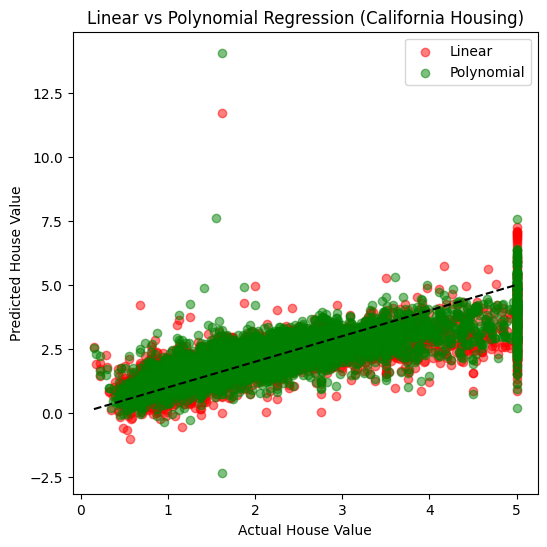

In [86]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Linear', color='red')
plt.scatter(y_test, y_pred_poly, alpha=0.5, label='Polynomial', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Linear vs Polynomial Regression (California Housing)")
plt.legend()
plt.show()

In [87]:
import pickle

# Save trained models
pickle.dump(lr, open('linear_model.pkl', 'wb'))
pickle.dump(regression, open('poly_model.pkl', 'wb'))
pickle.dump(poly, open('poly_transform.pkl', 'wb'))
